### 구글 드라이브와 Colab 연동

```
from google.colab import drive 
drive.mount('/content/gdrive') 
cd /content/gdrive/My Drive/Colab Notebooks
```

### Pandas 10분 완성 Clone coding
https://dataitgirls2.github.io/10minutes2pandas/

https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html

- Object Creation (객체 생성)
- Viewing Data (데이터 확인하기)
- Selection (선택) 
- Missing Data (결측치) 
- Operation (연산)
- Merge (병합)
- Grouping (그룹화)
- Reshaping (변형)
- Time Series (시계열)
- Categoricals (범주화)
- Plotting (그래프)
- Getting Data In / Out (데이터 입 / 출력)
- Gotchas (잡았다!)

## 1.Object Creation (객체 생성)

In [1]:
# 패키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

리스트를 통해 Series를 만들고, 정수로 만들어진 인덱스를 기본값으로 불러옴

Series의 타입 : `<class ‘pandas.core.series.Series’>`

기본 자료형 : `float64`

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

datetime 인덱스와 레이블이 있는 열을 가지고 있는 numpy 배열을 전달하여 데이터 프레임을 만든다.

In [3]:
dates = pd.date_range('20220109',periods=6)
dates

DatetimeIndex(['2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14'],
              dtype='datetime64[ns]', freq='D')

In [18]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2022-01-09,-1.300978,0.825185,-0.446545,-1.534153
2022-01-10,-0.970142,-0.391827,-0.362792,-1.005579
2022-01-11,0.640756,1.057522,-1.320833,1.074343
2022-01-12,0.991698,1.040910,0.110854,-0.153804
2022-01-13,0.729843,-0.822841,1.344895,-0.456202
2022-01-14,0.566448,-0.759055,1.556165,-0.446385


Series와 같은 것으로 변환될 수 있는 객체들의 dict로 구성된 데이터 프레임을 만든다.

In [5]:
df2 = pd.DataFrame({'A' : 1. ,
                    'B' : pd.Timestamp('20220109'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4, dtype= 'int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo'
                    })
df2

,A,B,C,D,E,F
0,1.0,2022-01-09,1.0,3,test,foo
1,1.0,2022-01-09,1.0,3,train,foo
2,1.0,2022-01-09,1.0,3,test,foo
3,1.0,2022-01-09,1.0,3,train,foo


데이터프레임 결과물의 열은 다양한 데이터 타입으로 구성됨.

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

IPython을 이용하면, Tap 자동완성 기능이 자동으로 활성화 됨!

`# df2.<TAB>`

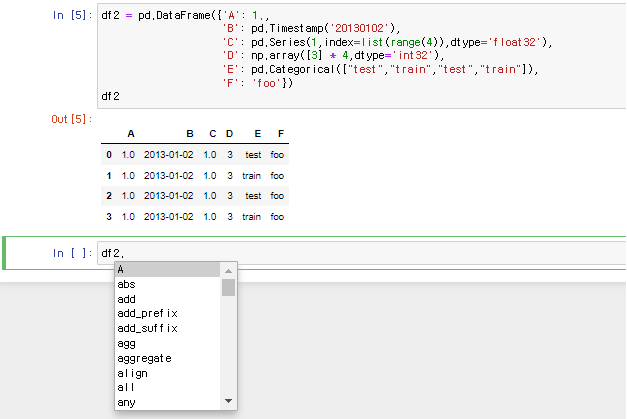

## 2.Viewing Data (데이터 확인하기)

데이터 프레임의 가장 윗 줄과 마지막 줄을 확인하고 싶을 때 사용

괄호() 안에 숫자가 들어갈 수도 있고, 안 들어갈 수도 있다. 

없으면 기본값 5

In [7]:
df.tail(3) # 끝에서 마지막 3줄 불러옴

,A,B,C,D
2022-01-12,1.845008,0.280468,-0.239341,-0.79074
2022-01-13,1.154621,0.348187,0.771034,1.86708
2022-01-14,-1.392437,1.518293,0.434877,0.09398


In [8]:
df.tail() # 끝에서 마지막 5줄 불러옴

,A,B,C,D
2022-01-10,-0.101702,-2.128918,1.692924,0.566314
2022-01-11,0.759715,-0.706843,0.227192,1.366849
2022-01-12,1.845008,0.280468,-0.239341,-0.790740
2022-01-13,1.154621,0.348187,0.771034,1.867080
2022-01-14,-1.392437,1.518293,0.434877,0.093980


In [9]:
df.head() # 위에서 5줄

,A,B,C,D
2022-01-09,-0.384789,0.001269,1.224525,0.081021
2022-01-10,-0.101702,-2.128918,1.692924,0.566314
2022-01-11,0.759715,-0.706843,0.227192,1.366849
2022-01-12,1.845008,0.280468,-0.239341,-0.790740
2022-01-13,1.154621,0.348187,0.771034,1.867080


인덱스 (index), 열 (column) 그리고 numpy 데이터에 대한 세부 정보

In [20]:
df.index

DatetimeIndex(['2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14'],
              dtype='datetime64[ns]', freq='D')

In [21]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [22]:
df.values

array([[-1.30097772,  0.82518535, -0.44654459, -1.5341535 ],
       [-0.97014211, -0.39182684, -0.36279228, -1.00557852],
       [ 0.64075594,  1.05752233, -1.32083256,  1.07434347],
       [ 0.99169774,  1.04090961,  0.11085358, -0.15380425],
       [ 0.72984277, -0.82284142,  1.34489459, -0.4562022 ],
       [ 0.56644774, -0.75905549,  1.55616509, -0.44638472]])

데이터의 대략적인 통계적 정보 요약

In [23]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.109604,0.158316,0.146957,-0.420297
std,0.980735,0.909852,1.112539,0.882062
min,-1.300978,-0.822841,-1.320833,-1.534153
25%,-0.585995,-0.667248,-0.425607,-0.868234
50%,0.603602,0.216679,-0.125969,-0.451293
75%,0.707571,0.986979,1.036384,-0.226949
max,0.991698,1.057522,1.556165,1.074343


데이터를 전치

In [24]:
df.T

,2022-01-09,2022-01-10,2022-01-11,2022-01-12,2022-01-13,2022-01-14
A,-1.300978,-0.970142,0.640756,0.991698,0.729843,0.566448
B,0.825185,-0.391827,1.057522,1.040910,-0.822841,-0.759055
C,-0.446545,-0.362792,-1.320833,0.110854,1.344895,1.556165
D,-1.534153,-1.005579,1.074343,-0.153804,-0.456202,-0.446385


In [25]:
df.transpose()

,2022-01-09,2022-01-10,2022-01-11,2022-01-12,2022-01-13,2022-01-14
A,-1.300978,-0.970142,0.640756,0.991698,0.729843,0.566448
B,0.825185,-0.391827,1.057522,1.040910,-0.822841,-0.759055
C,-0.446545,-0.362792,-1.320833,0.110854,1.344895,1.556165
D,-1.534153,-1.005579,1.074343,-0.153804,-0.456202,-0.446385


In [16]:
df = df.reset_index()
df

,index,A,B,C,D
0,2022-01-09,-0.384789,0.001269,1.224525,0.081021
1,2022-01-10,-0.101702,-2.128918,1.692924,0.566314
2,2022-01-11,0.759715,-0.706843,0.227192,1.366849
3,2022-01-12,1.845008,0.280468,-0.239341,-0.790740
4,2022-01-13,1.154621,0.348187,0.771034,1.867080
5,2022-01-14,-1.392437,1.518293,0.434877,0.093980


In [17]:
df.melt(id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])

,index,variable,value
0,2022-01-09,A,-0.384789
1,2022-01-10,A,-0.101702
2,2022-01-11,A,0.759715
3,2022-01-12,A,1.845008
4,2022-01-13,A,1.154621
5,2022-01-14,A,-1.392437
6,2022-01-09,B,0.001269
7,2022-01-10,B,-2.128918
8,2022-01-11,B,-0.706843
9,2022-01-12,B,0.280468


축 별로 정렬

In [26]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2022-01-09,-1.534153,-0.446545,0.825185,-1.300978
2022-01-10,-1.005579,-0.362792,-0.391827,-0.970142
2022-01-11,1.074343,-1.320833,1.057522,0.640756
2022-01-12,-0.153804,0.110854,1.040910,0.991698
2022-01-13,-0.456202,1.344895,-0.822841,0.729843
2022-01-14,-0.446385,1.556165,-0.759055,0.566448


값 별로 정렬

In [27]:
df.sort_values(by='B')

,A,B,C,D
2022-01-13,0.729843,-0.822841,1.344895,-0.456202
2022-01-14,0.566448,-0.759055,1.556165,-0.446385
2022-01-10,-0.970142,-0.391827,-0.362792,-1.005579
2022-01-09,-1.300978,0.825185,-0.446545,-1.534153
2022-01-12,0.991698,1.040910,0.110854,-0.153804
2022-01-11,0.640756,1.057522,-1.320833,1.074343


## 3.Selection (선택)

Pandas에 최적화된 데이터 접근 방법인 `.at`, `.iat`, `.loc` 및 `.iloc` 

### Getting(데이터 얻기)

df.A와 동일한 Series를 생성하는 단일 열 선택

In [28]:
df['A']

2022-01-09   -1.300978
2022-01-10   -0.970142
2022-01-11    0.640756
2022-01-12    0.991698
2022-01-13    0.729843
2022-01-14    0.566448
Freq: D, Name: A, dtype: float64

행을 분할하는 `[]`를 통해 선택 한다.

In [29]:
df[0:3]

,A,B,C,D
2022-01-09,-1.300978,0.825185,-0.446545,-1.534153
2022-01-10,-0.970142,-0.391827,-0.362792,-1.005579
2022-01-11,0.640756,1.057522,-1.320833,1.074343


In [30]:
df['20220109':'20220111']

,A,B,C,D
2022-01-09,-1.300978,0.825185,-0.446545,-1.534153
2022-01-10,-0.970142,-0.391827,-0.362792,-1.005579
2022-01-11,0.640756,1.057522,-1.320833,1.074343


### Selection by Label (Label 을 통한 선택)

라벨을 사용하여 횡단면을 얻는다.

In [31]:
df.loc[dates[0]]

A   -1.300978
B    0.825185
C   -0.446545
D   -1.534153
Name: 2022-01-09 00:00:00, dtype: float64

라벨을 사용해 여러 축의 데이터를 얻는다.

In [32]:
df.loc[:,['A','B']]

,A,B
2022-01-09,-1.300978,0.825185
2022-01-10,-0.970142,-0.391827
2022-01-11,0.640756,1.057522
2022-01-12,0.991698,1.040910
2022-01-13,0.729843,-0.822841
2022-01-14,0.566448,-0.759055


양쪽 종단점을 포함한 라벨 슬라이싱을 본다.

In [33]:
df.loc['20220109':'20220111',['A','C']]

,A,C
2022-01-09,-1.300978,-0.446545
2022-01-10,-0.970142,-0.362792
2022-01-11,0.640756,-1.320833


반환되는 객체의 차원을 줄인다.

In [34]:
df.loc['20220109',['A','B']]

A   -1.300978
B    0.825185
Name: 2022-01-09 00:00:00, dtype: float64

스칼라 값을 얻는다.

In [35]:
df.loc[dates[0],'A']

-1.3009777185556364

In [36]:
df.at[dates[0],'A']

-1.3009777185556364

### Selection by Position (위치로 선택하기)

넘겨받은 정수의 위치를 기준으로 선택

In [37]:
df.iloc[3]

A    0.991698
B    1.040910
C    0.110854
D   -0.153804
Name: 2022-01-12 00:00:00, dtype: float64

정수로 표기된 슬라이스들을 통해, numpy/python과 유사하게 작동함

In [38]:
df.iloc[3:5,0:2]

,A,B
2022-01-12,0.991698,1.040910
2022-01-13,0.729843,-0.822841


정수로 표기된 위치값의 리스트들을 통해, numpy/python의 스타일과 유사해 짐

In [39]:
df.iloc[[1,2,4],[0,2]]

,A,C
2022-01-10,-0.970142,-0.362792
2022-01-11,0.640756,-1.320833
2022-01-13,0.729843,1.344895


명시적으로 행을 나누고자 하는 경우

In [40]:
df.iloc[1:3,:]

,A,B,C,D
2022-01-10,-0.970142,-0.391827,-0.362792,-1.005579
2022-01-11,0.640756,1.057522,-1.320833,1.074343


명시적으로 열을 나누고자 하는 경우

In [41]:
df.iloc[:,1:3]

,B,C
2022-01-09,0.825185,-0.446545
2022-01-10,-0.391827,-0.362792
2022-01-11,1.057522,-1.320833
2022-01-12,1.040910,0.110854
2022-01-13,-0.822841,1.344895
2022-01-14,-0.759055,1.556165


명시적으로 값을 얻고자 하는 경우

In [42]:
df.iloc[1,1]

-0.3918268435637121

스칼라 값을 빠르게 얻는 방법 (위와 동일)

In [43]:
df.iat[1,1]

-0.3918268435637121

### Boolean Indexing

In [44]:
df[df.A>0]

,A,B,C,D
2022-01-11,0.640756,1.057522,-1.320833,1.074343
2022-01-12,0.991698,1.040910,0.110854,-0.153804
2022-01-13,0.729843,-0.822841,1.344895,-0.456202
2022-01-14,0.566448,-0.759055,1.556165,-0.446385


Boolean 조건을 충족하는 데이터프레임에서 값을 선택

In [45]:
df[df>0]

,A,B,C,D
2022-01-09,NaN,0.825185,NaN,NaN
2022-01-10,NaN,NaN,NaN,NaN
2022-01-11,0.640756,1.057522,NaN,1.074343
2022-01-12,0.991698,1.040910,0.110854,NaN
2022-01-13,0.729843,NaN,1.344895,NaN
2022-01-14,0.566448,NaN,1.556165,NaN


필터링을 위한 메소드 `isin()`을 사용

In [46]:
df2 = df.copy()
df2['E'] =['one','one','two','three','four','three']
df2

,A,B,C,D,E
2022-01-09,-1.300978,0.825185,-0.446545,-1.534153,one
2022-01-10,-0.970142,-0.391827,-0.362792,-1.005579,one
2022-01-11,0.640756,1.057522,-1.320833,1.074343,two
2022-01-12,0.991698,1.040910,0.110854,-0.153804,three
2022-01-13,0.729843,-0.822841,1.344895,-0.456202,four
2022-01-14,0.566448,-0.759055,1.556165,-0.446385,three


In [47]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2022-01-11,0.640756,1.057522,-1.320833,1.074343,two
2022-01-13,0.729843,-0.822841,1.344895,-0.456202,four


### Setting(설정)

새 열을 설정하면 데이터가 인덱스 별로 자동 정렬됨

In [54]:
 s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range('20220109',periods=6))
 s1

2022-01-09    1
2022-01-10    2
2022-01-11    3
2022-01-12    4
2022-01-13    5
2022-01-14    6
Freq: D, dtype: int64

In [55]:
df['F'] = s1

라벨에 의해 값을 설정한다.

In [56]:
df.at[dates[0],'A']=0

위치에 의해 값을 설정한다.

In [57]:
df.iat[0,1] =0

Numpy 배열을 사용한 할당에 의해 값을 설정

In [58]:
df.loc[:,'D'] = np.array([5] * len(df))

In [59]:
df

,A,B,C,D,F
2022-01-09,0.000000,0.000000,-0.446545,5,1
2022-01-10,-0.970142,-0.391827,-0.362792,5,2
2022-01-11,0.640756,1.057522,-1.320833,5,3
2022-01-12,0.991698,1.040910,0.110854,5,4
2022-01-13,0.729843,-0.822841,1.344895,5,5
2022-01-14,0.566448,-0.759055,1.556165,5,6


where 연산을 설정

In [60]:
df2 = df.copy()

In [61]:
df2[df2>0] = -df2
df2

,A,B,C,D,F
2022-01-09,0.000000,0.000000,-0.446545,-5,-1
2022-01-10,-0.970142,-0.391827,-0.362792,-5,-2
2022-01-11,-0.640756,-1.057522,-1.320833,-5,-3
2022-01-12,-0.991698,-1.040910,-0.110854,-5,-4
2022-01-13,-0.729843,-0.822841,-1.344895,-5,-5
2022-01-14,-0.566448,-0.759055,-1.556165,-5,-6


## 4.Missing Data (결측치)

결측치를 표현하기 위해 주로 `np.nan` 값을 사용

 Reindexing으로 지정된 축 상의 인덱스를 변경/추가/삭제할 수 있다.
 
 Reindexing은 데이터의 복사본을 반환

In [69]:
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E']=1
df1

,A,B,C,D,F,E
2022-01-09,0.000000,0.000000,-0.446545,5,1,1.0
2022-01-10,-0.970142,-0.391827,-0.362792,5,2,1.0
2022-01-11,0.640756,1.057522,-1.320833,5,3,NaN
2022-01-12,0.991698,1.040910,0.110854,5,4,NaN


결측치를 가지고 있는 행들을 지운다.

In [70]:
df1.dropna(how='any')

,A,B,C,D,F,E
2022-01-09,0.000000,0.000000,-0.446545,5,1,1.0
2022-01-10,-0.970142,-0.391827,-0.362792,5,2,1.0


결측치를 채워 넣는다.

In [71]:
df1.fillna(value=5)

,A,B,C,D,F,E
2022-01-09,0.000000,0.000000,-0.446545,5,1,1.0
2022-01-10,-0.970142,-0.391827,-0.362792,5,2,1.0
2022-01-11,0.640756,1.057522,-1.320833,5,3,5.0
2022-01-12,0.991698,1.040910,0.110854,5,4,5.0


nan인 값에 boolean을 통한 표식을 얻는다.

데이터프레임의 모든 값이 boolean 형태로 표시되도록 하며, nan인 값에만 True가 표시되게 하는 함수

In [73]:
pd.isna(df1)

,A,B,C,D,F,E
2022-01-09,False,False,False,False,False,False
2022-01-10,False,False,False,False,False,False
2022-01-11,False,False,False,False,False,True
2022-01-12,False,False,False,False,False,True
